<a href="https://colab.research.google.com/github/Kruthika2811/Tuberculosis-Early-Prediction/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load dataset
df = pd.read_csv("merged_health_data.csv")

In [ ]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

Shape: (10000, 32)


In [ ]:
# Column names
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['acc_chest_x', 'acc_chest_y', 'acc_chest_z', 'ecg_lead1', 'ecg_lead2', 'acc_left_ankle_x', 'acc_left_ankle_y', 'acc_left_ankle_z', 'gyro_left_ankle_x', 'gyro_left_ankle_y', 'gyro_left_ankle_z', 'mag_left_ankle_x', 'mag_left_ankle_y', 'mag_left_ankle_z', 'acc_right_arm_x', 'acc_right_arm_y', 'acc_right_arm_z', 'gyro_right_arm_x', 'gyro_right_arm_y', 'gyro_right_arm_z', 'mag_right_arm_x', 'mag_right_arm_y', 'mag_right_arm_z', 'label', 'subject_id', 'age', 'sex', 'heart_rate_bpm', 'temperature_c', 'breath_ammonia_ppm', 'bmi', 'tb_positive']


In [ ]:

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 acc_chest_x           0
acc_chest_y           0
acc_chest_z           0
ecg_lead1             0
ecg_lead2             0
acc_left_ankle_x      0
acc_left_ankle_y      0
acc_left_ankle_z      0
gyro_left_ankle_x     0
gyro_left_ankle_y     0
gyro_left_ankle_z     0
mag_left_ankle_x      0
mag_left_ankle_y      0
mag_left_ankle_z      0
acc_right_arm_x       0
acc_right_arm_y       0
acc_right_arm_z       0
gyro_right_arm_x      0
gyro_right_arm_y      0
gyro_right_arm_z      0
mag_right_arm_x       0
mag_right_arm_y       0
mag_right_arm_z       0
label                 0
subject_id            0
age                   0
sex                   0
heart_rate_bpm        0
temperature_c         0
breath_ammonia_ppm    0
bmi                   0
tb_positive           0
dtype: int64


In [ ]:
# Preview first 5 rows
print("\nHead:\n", df.head())


Head:
    acc_chest_x  acc_chest_y  acc_chest_z  ecg_lead1  ecg_lead2  \
0      -9.8815     -0.37141     -2.03340   0.138150   0.117220   
1      -9.1453     -0.81454      3.62140  -0.012559   0.025118   
2      -9.6013     -1.24980     -0.78616  -0.489800  -0.163270   
3      -6.4327     -1.09120     -1.35080   0.058608   0.046049   
4      -8.5367     -0.43745     -2.16570  -0.159080  -0.062794   

   acc_left_ankle_x  acc_left_ankle_y  acc_left_ankle_z  gyro_left_ankle_x  \
0           0.36344           -9.8216           1.01260            0.39703   
1           2.49590           -9.4423          -0.66591           -0.44341   
2           1.32190           -9.5220           2.25590           -0.58813   
3           2.20960           -8.6338          -2.98250           -0.77180   
4          -2.05590          -12.7220           2.09340           -0.42486   

   gyro_left_ankle_y  ...  mag_right_arm_z  label         subject_id  age  \
0           -0.90244  ...          -6.6257      0

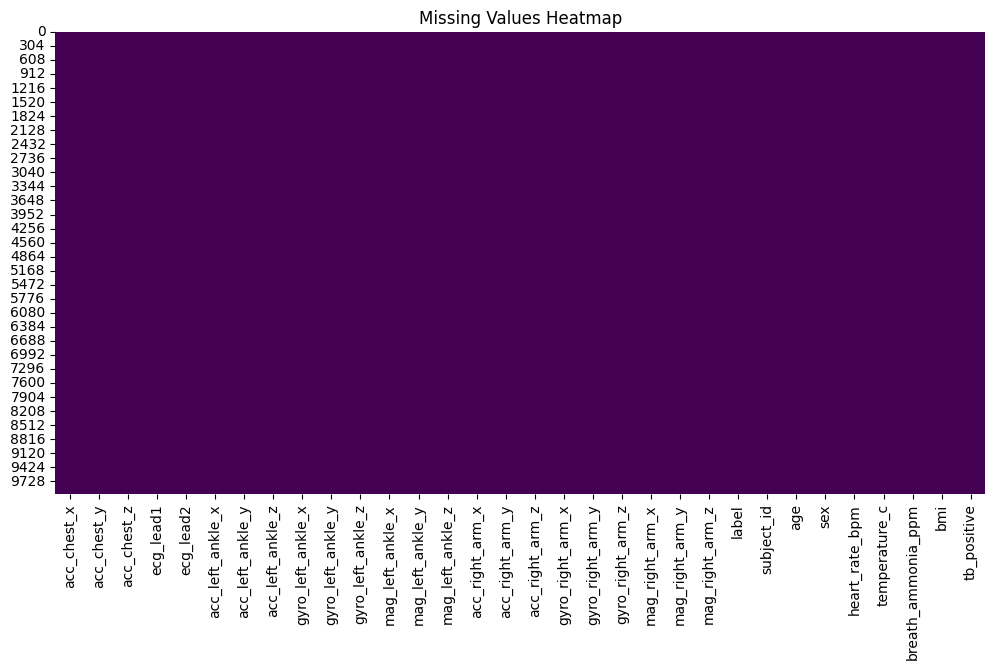

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
print("Non-null counts:\n")
print(df.notnull().sum())


Non-null counts:

acc_chest_x           10000
acc_chest_y           10000
acc_chest_z           10000
ecg_lead1             10000
ecg_lead2             10000
acc_left_ankle_x      10000
acc_left_ankle_y      10000
acc_left_ankle_z      10000
gyro_left_ankle_x     10000
gyro_left_ankle_y     10000
gyro_left_ankle_z     10000
mag_left_ankle_x      10000
mag_left_ankle_y      10000
mag_left_ankle_z      10000
acc_right_arm_x       10000
acc_right_arm_y       10000
acc_right_arm_z       10000
gyro_right_arm_x      10000
gyro_right_arm_y      10000
gyro_right_arm_z      10000
mag_right_arm_x       10000
mag_right_arm_y       10000
mag_right_arm_z       10000
label                 10000
subject_id            10000
age                   10000
sex                   10000
heart_rate_bpm        10000
temperature_c         10000
breath_ammonia_ppm    10000
bmi                   10000
tb_positive           10000
dtype: int64


In [ ]:
# TB dataset part (rows that have age info)
tb_part = df[df['age'].notnull()]

# MHEALTH dataset part (rows that have ecg_lead1 info)
mhealth_part = df[df['ecg_lead1'].notnull()]

print("TB part shape:", tb_part.shape)
print("MHEALTH part shape:", mhealth_part.shape)


TB part shape: (10000, 32)
MHEALTH part shape: (10000, 32)


In [ ]:
tb_part.to_csv("tb_part.csv", index=False)
mhealth_part.to_csv("mhealth_part.csv", index=False)

from google.colab import files
files.download("tb_part.csv")
files.download("mhealth_part.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# STEP 1: Upload merged dataset
uploaded = files.upload()   # choose merged_health_data.csv

# STEP 2: Load dataset
df = pd.read_csv("merged_health_data.csv")

# STEP 3: Create heart_rate_bpm (from ECG if available, else TB column)
df["heart_rate_bpm_final"] = df[["ecg_lead1", "ecg_lead2"]].mean(axis=1)
df.loc[df["heart_rate_bpm_final"].isna(), "heart_rate_bpm_final"] = df["heart_rate_bpm"]

# STEP 4: Build unified dataset
df_unified = pd.DataFrame({
    "age": df.get("age"),
    "sex": df.get("sex"),
    "heart_rate_bpm": df["heart_rate_bpm_final"],
    "temperature_c": df.get("temperature_c"),
    "breath_ammonia_ppm": df.get("breath_ammonia_ppm"),
    "bmi": df.get("bmi"),
    "tb_positive": df.get("tb_positive")
})

# STEP 5: Fill missing values with realistic ranges
df_unified.loc[df_unified["age"].isna(), "age"] = np.random.randint(18, 60, df_unified["age"].isna().sum())
df_unified.loc[df_unified["sex"].isna(), "sex"] = np.random.choice(["M", "F"], df_unified["sex"].isna().sum())
df_unified.loc[df_unified["temperature_c"].isna(), "temperature_c"] = np.round(np.random.uniform(36, 39, df_unified["temperature_c"].isna().sum()), 1)
df_unified.loc[df_unified["breath_ammonia_ppm"].isna(), "breath_ammonia_ppm"] = np.round(np.random.uniform(1, 5, df_unified["breath_ammonia_ppm"].isna().sum()), 2)
df_unified.loc[df_unified["bmi"].isna(), "bmi"] = np.round(np.random.uniform(18, 35, df_unified["bmi"].isna().sum()), 1)

# STEP 6: Balance TB dataset
tb_data = df_unified[df_unified["tb_positive"].notna()]
tb_positive = tb_data[tb_data["tb_positive"] == 1]
tb_negative = tb_data[tb_data["tb_positive"] == 0]

tb_positive_balanced = resample(tb_positive,
                                replace=True,
                                n_samples=len(tb_negative),
                                random_state=42)

tb_balanced = pd.concat([tb_negative, tb_positive_balanced])

# STEP 7: Add MHEALTH data (assume non-TB → tb_positive = 0)
mhealth_data = df_unified[df_unified["tb_positive"].isna()].copy()
mhealth_data["tb_positive"] = 0

# STEP 8: Final combined dataset
df_final = pd.concat([tb_balanced, mhealth_data], ignore_index=True)

# STEP 9: Limit dataset to 10,000 rows
df_final_10k = df_final.sample(n=10000, random_state=42)

# STEP 10: Split into Train (80%) and Test (20%)
train, test = train_test_split(df_final_10k, test_size=0.2, random_state=42, stratify=df_final_10k["tb_positive"])

# STEP 11: Save all files
df_final_10k.to_csv("unified_health_dataset_10k.csv", index=False)
train.to_csv("train_dataset.csv", index=False)
test.to_csv("test_dataset.csv", index=False)

# STEP 12: Download
files.download("unified_health_dataset_10k.csv")
files.download("train_dataset.csv")
files.download("test_dataset.csv")


Saving merged_health_data.csv to merged_health_data (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# 1. Load datasets
# --------------------------
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")


In [ ]:

# --------------------------
# 2. Encode categorical column (sex)
# --------------------------
le = LabelEncoder()
train["sex"] = le.fit_transform(train["sex"])
test["sex"] = le.transform(test["sex"])   # use same encoder

In [ ]:
# --------------------------
# 3. Scale numeric columns
# --------------------------
scaler = StandardScaler()
num_cols = ["age", "heart_rate_bpm", "temperature_c", "breath_ammonia_ppm", "bmi"]

train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [ ]:
# --------------------------
# 4. Split features & target
# --------------------------
X_train = train.drop("tb_positive", axis=1)
y_train = train["tb_positive"]

X_test = test.drop("tb_positive", axis=1)
y_test = test["tb_positive"]

In [ ]:
# --------------------------
# 5. Train Random Forest model
# --------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --------------------------
# 6. Predictions & Evaluation
# --------------------------
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.998

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00       997

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


🔍 Confusion Matrix:
 [[1001    2]
 [   2  995]]


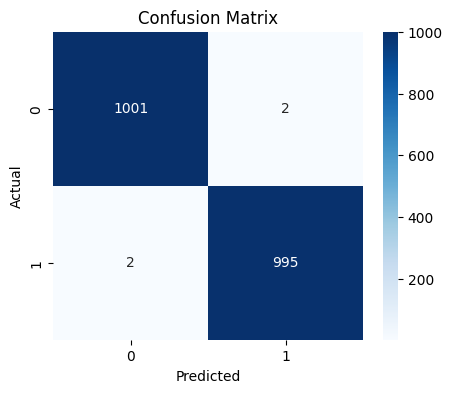

In [ ]:
# --------------------------
# 7. Confusion Matrix Plot
# --------------------------
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

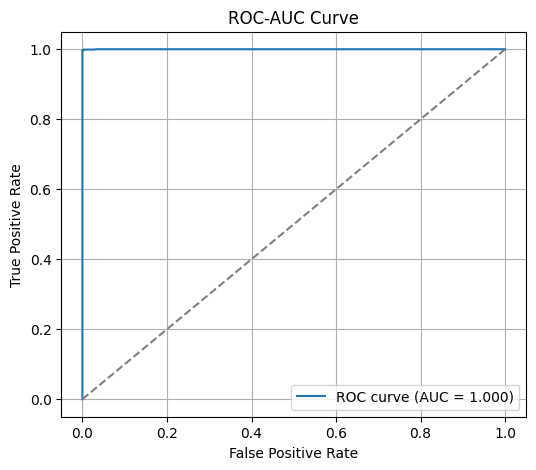

In [ ]:
# --------------------------
# 8. ROC-AUC Curve
# --------------------------
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities (positive class = 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


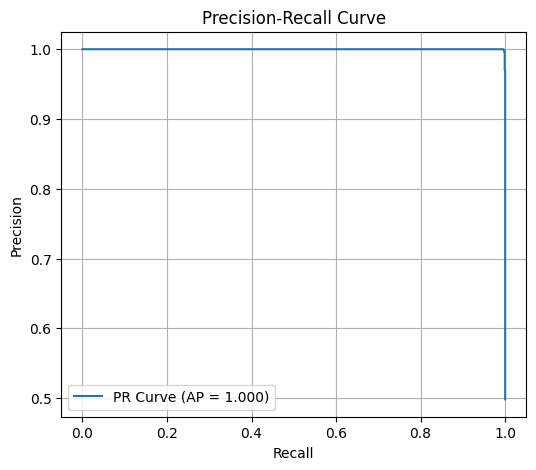

In [ ]:
# --------------------------
# 9. Precision-Recall Curve
# --------------------------
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision, recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_prec:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


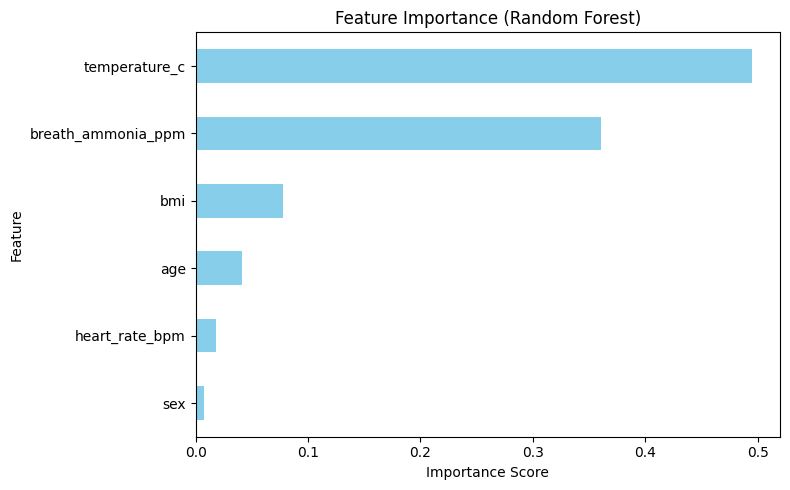


📊 Feature Importance Scores:

temperature_c         0.495026
breath_ammonia_ppm    0.360384
bmi                   0.077756
age                   0.041469
heart_rate_bpm        0.017876
sex                   0.007489
dtype: float64


In [ ]:
# --------------------------
# 10. Feature Importance (Random Forest)
# --------------------------
import pandas as pd

# Check if model supports feature_importances_
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    features = X_train.columns
    fi_series = pd.Series(importances, index=features).sort_values(ascending=True)

    # Plot
    plt.figure(figsize=(8,5))
    fi_series.plot(kind="barh", color="skyblue")
    plt.title("Feature Importance (Random Forest)")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    print("\n📊 Feature Importance Scores:\n")
    print(fi_series.sort_values(ascending=False))
else:
    print("⚠️ This model has no attribute `feature_importances_`.")


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Check accuracy on test set (optional)
print("Test Accuracy:", lr_model.score(X_test, y_test))


Test Accuracy: 0.937


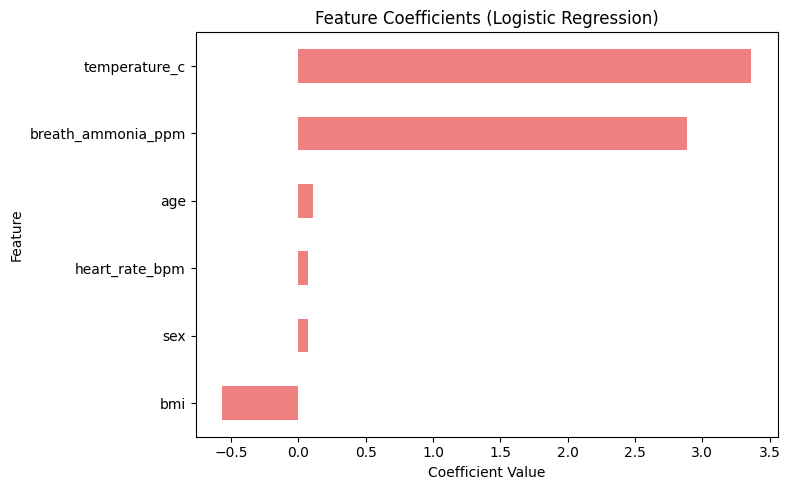


📊 Logistic Regression Coefficients:

temperature_c         3.362488
breath_ammonia_ppm    2.889128
age                   0.112492
heart_rate_bpm        0.074759
sex                   0.069278
bmi                  -0.566336
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

coefs = lr_model.coef_[0]
features = X_train.columns
coef_series = pd.Series(coefs, index=features).sort_values(ascending=True)

plt.figure(figsize=(8,5))
coef_series.plot(kind="barh", color="lightcoral")
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\n📊 Logistic Regression Coefficients:\n")
print(coef_series.sort_values(ascending=False))


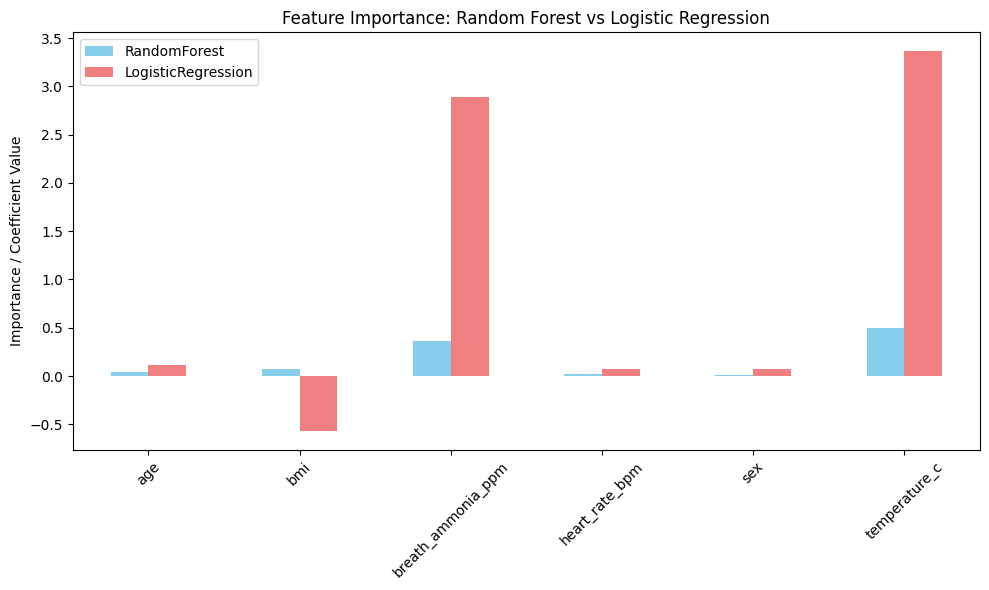

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Random Forest importances (fi_series) already exists
# Logistic Regression coefficients (coef_series) already exists

comparison_df = pd.DataFrame({
    "RandomForest": fi_series.sort_index(),
    "LogisticRegression": coef_series.sort_index()
})

comparison_df.plot(kind="bar", figsize=(10,6), color=["skyblue", "lightcoral"])
plt.title("Feature Importance: Random Forest vs Logistic Regression")
plt.ylabel("Importance / Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


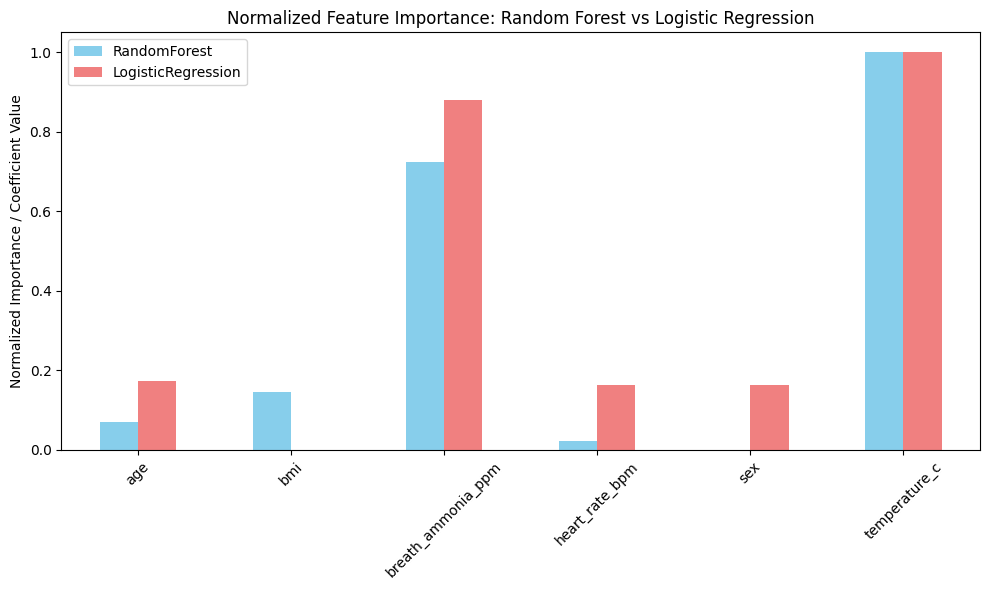


📊 Normalized Feature Comparison:

                    RandomForest  LogisticRegression
age                     0.069696            0.172782
bmi                     0.144127            0.000000
breath_ammonia_ppm      0.723831            0.879516
heart_rate_bpm          0.021304            0.163177
sex                     0.000000            0.161782
temperature_c           1.000000            1.000000


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Combine RF importances and LR coefficients into one DataFrame
comparison_df = pd.DataFrame({
    "RandomForest": fi_series.sort_index(),
    "LogisticRegression": coef_series.sort_index()
})

# Normalize both columns to [0,1] for comparison
scaler = MinMaxScaler()
comparison_df_scaled = pd.DataFrame(
    scaler.fit_transform(comparison_df),
    columns=comparison_df.columns,
    index=comparison_df.index
)

# Plot side-by-side bar chart
comparison_df_scaled.plot(kind="bar", figsize=(10,6), color=["skyblue", "lightcoral"])
plt.title("Normalized Feature Importance: Random Forest vs Logistic Regression")
plt.ylabel("Normalized Importance / Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print normalized values
print("\n📊 Normalized Feature Comparison:\n")
print(comparison_df_scaled)


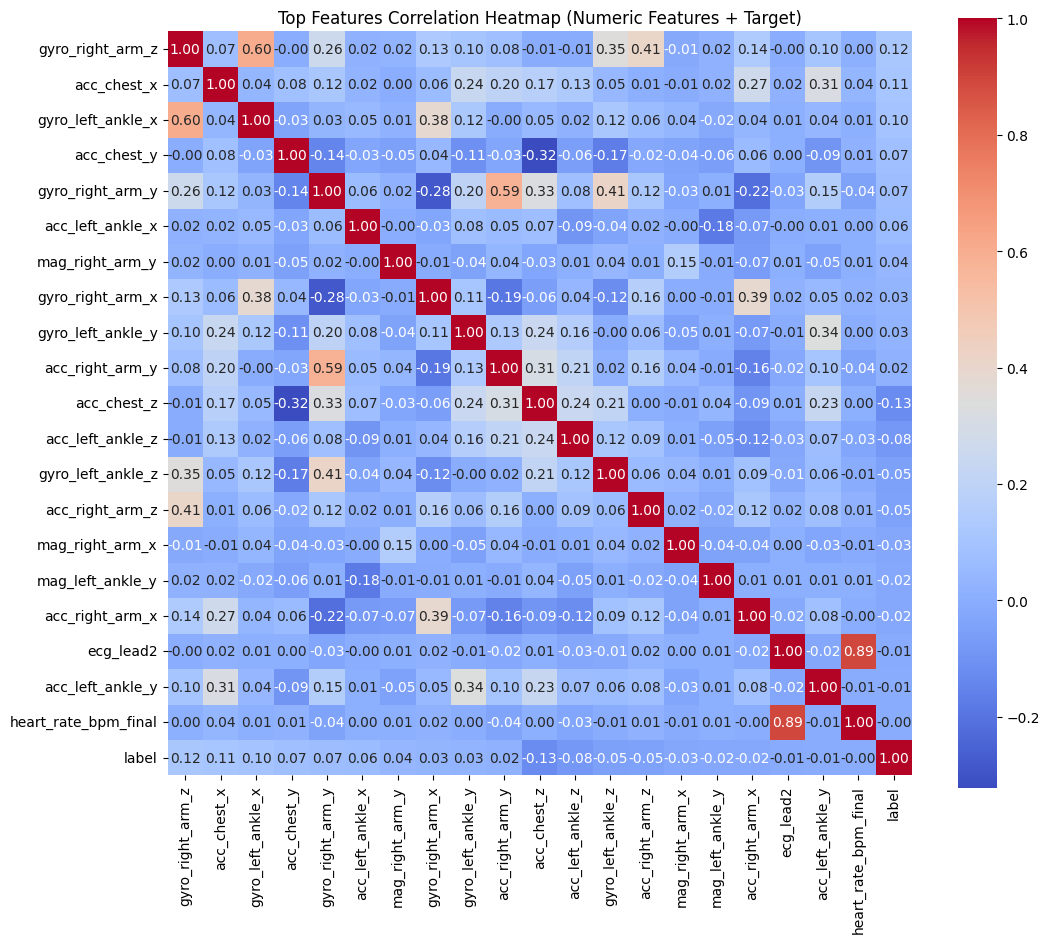

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Specify your target col
target_col = 'label'  # replace with 'tb_positive' if that is your target

# 2. Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure target column is included
if target_col not in numeric_cols:
    numeric_cols.append(target_col)

# 3. Compute correlations with target
corr_with_target = df[numeric_cols].corr()[target_col].drop(target_col)

# 4. Select top 10 positive and top 10 negative correlations
top_features = corr_with_target.sort_values(ascending=False).head(10).index.tolist()
bottom_features = corr_with_target.sort_values().head(10).index.tolist()
selected_features = top_features + bottom_features + [target_col]

# 5. Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Top Features Correlation Heatmap (Numeric Features + Target)")
plt.show()


In [ ]:
import joblib

# Save models
joblib.dump(model, "random_forest_tb.pkl")
joblib.dump(lr_model, "logistic_regression_tb.pkl")

# Save encoder and scaler
joblib.dump(le, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

from google.colab import files

files.download("random_forest_tb.pkl")
files.download("logistic_regression_tb.pkl")
files.download("label_encoder.pkl")
files.download("scaler.pkl")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>